# Develop the application side to query the machine API

The simluator is ready to report sensor data via the machine API. Now we need to query the API.
We do this the same way as you did before: by loading the data from the web site.

## Tasks

1. Study the code, run it and see what it returns
2. Get different number of records and plots its distribution
3. Run a model prediction and check its results

In [53]:
import os
import requests
import pandas as pd
import joblib
import numpy as np
import time

def read_data(records=100):
    resp = requests.get(f'http://localhost:5000/query/{records}')
    data = resp.json()

    df = pd.DataFrame({
        'dt': [v[0] for v in data['values']],
        'value': [v[1] for v in data['values']],
    })
    return df


df = read_data(1000)
df

,dt,value
0,2021-10-15T01:30:20.848419,0.452254
1,2021-10-15T01:30:20.862331,0.195916
2,2021-10-15T01:30:20.948784,0.014203
3,2021-10-15T01:30:20.962652,0.565741
4,2021-10-15T01:30:21.049100,0.103986
...,...,...
995,2021-10-15T01:31:10.713091,0.040624
996,2021-10-15T01:31:10.793553,0.073023
997,2021-10-15T01:31:10.813380,0.218656
998,2021-10-15T01:31:10.893844,0.041137


# Get different number of sensor readings and plot results

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

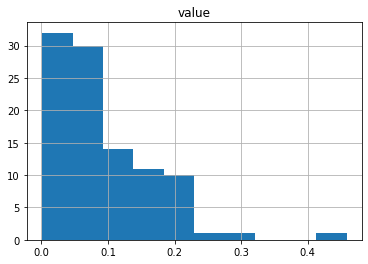

In [28]:
df = read_data(100)
df.hist()

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

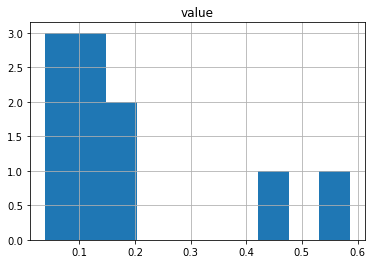

In [29]:
df = read_data(10)
df.hist()

# Predict outliers from the data queried from the actual machine

Is the result as expected?

<AxesSubplot:>

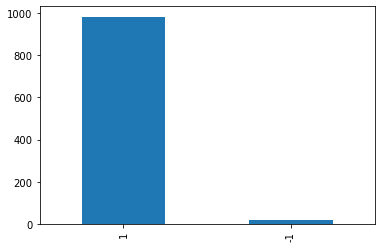

In [51]:
from util import load_model

model = load_model('models/mymodel')
df = read_data(1000)
y_hat = model.predict(df['value'].values.reshape(-1, 1))
pd.Series(y_hat).value_counts().plot(kind='bar')